
<p style="background-color:#A7FC86;color:black;font-size:22px;text-align:center;border-radius:10px 12px;font-weight:bold;border: 3px solid green;">HOUSE SALES PRICE PREDICTION 🏘 💲 </p>

<center><img src="https://github.com/Isharaneranjana/kaggle_gif/blob/main/Advanced%20analysis.gif?raw=true"></center>



## <p style="background-color:#A7FC86;color:black;font-size:21px;text-align:center;border-radius:10px 11px;">🧿Introduction </p>

<font size="4">House price prediction is a significant financial decision for individuals working in the housing market as well as for potential buyers. House prices can be predicted by the given explanatory variables that cover many aspects of residential houses. The goal of this notebook is to create a regression model that is able to accurately estimate the price of the house given the features. </font>

<center><img src="https://media.giphy.com/media/l3vR4wCyiyjvHT3JS/giphy.gif"></center>


## <p style="background-color:#A7FC86;color:black;font-size:21px;text-align:center;border-radius:10px 10px;">🔐Description of the dataset </p>

<font size="4">There are 79 explanatory variables describing (almost) every aspect of residential homes in Ames.</font>

Here's a brief version of the data description file.

* SalePrice      : the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass     : The building class
* MSZoning       : The general zoning classification
* LotFrontage    : Linear feet of street connected to property
* LotArea        : Lot size in square feet
* Street         : Type of road access
* Alley          : Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# lodaing the training set
train= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

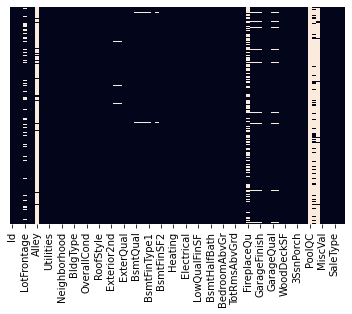

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

## <p style="background-color:#A7FC86;color:black;font-size:21px;text-align:center;border-radius:10px 10px;"> 💢Data Preprocessing </p>

<font size="4"> There are many missing values in columns. we need to impute some of them.let's check missing value percentages. </font>

In [8]:
features=[features for features in train.columns if train[features].isnull().sum()>1]
for feature in features:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values.\n')

LotFrontage 0.1774  % missing values.

Alley 0.9377  % missing values.

MasVnrType 0.0055  % missing values.

MasVnrArea 0.0055  % missing values.

BsmtQual 0.0253  % missing values.

BsmtCond 0.0253  % missing values.

BsmtExposure 0.026  % missing values.

BsmtFinType1 0.0253  % missing values.

BsmtFinType2 0.026  % missing values.

FireplaceQu 0.4726  % missing values.

GarageType 0.0555  % missing values.

GarageYrBlt 0.0555  % missing values.

GarageFinish 0.0555  % missing values.

GarageQual 0.0555  % missing values.

GarageCond 0.0555  % missing values.

PoolQC 0.9952  % missing values.

Fence 0.8075  % missing values.

MiscFeature 0.963  % missing values.



In [9]:
#remove features with more than 20 percent missing values.
train=train.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],1)
#remove ID column since it has unique values which are not important to our predicitive model.
train=train.drop(['Id'],1)

In [10]:
test=test.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],1)
#remove ID column since it has unique values which are not important to our predicitive model.
test=test.drop(['Id'],1)

#### <font size="4">There are numerical and categorical variables in this dataset. so lets first see some descriptive statistics about categorical variables.</font>

In [11]:
categorical_cols_train= train.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols_train.columns.tolist())} categorical columns')

The dataset contains 38 categorical columns


In [12]:
categorical_cols_train.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


<font size="4">since there are very less number of missing values in categorical variables, I will impute that using mode. </font>

In [13]:
categorical_cols_missing = categorical_cols_train.columns[categorical_cols_train.isnull().any()]
categorical_cols_missing
#there are some observations as none which are not missing values. 

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [14]:
from sklearn.impute import SimpleImputer
categoricalImputer = SimpleImputer(missing_values = np.NaN,strategy = 'most_frequent')
for feature in categorical_cols_missing:
     categorical_cols_train[feature] = categoricalImputer.fit_transform(categorical_cols_train[feature].values.reshape(-1,1))
     train[feature] = categoricalImputer.fit_transform(train[feature].values.reshape(-1,1))

<font size="4"> If we use the same method to impute categorical missing values. then it will not be imputed from training set. since there may be differences in mode of those variables in train and test sets.</font>

In [15]:
test['MasVnrType']=test['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
test['Electrical']=test['Electrical'].fillna(train['Electrical'].mode()[0])
test['GarageType']=test['GarageType'].fillna(train['GarageType'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(train['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(train['GarageCond'].mode()[0])

<AxesSubplot:>

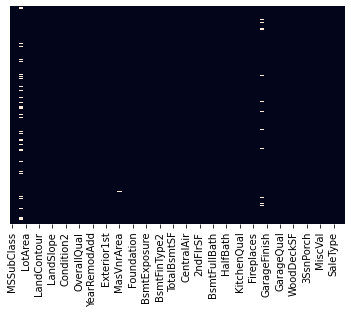

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [17]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

<AxesSubplot:>

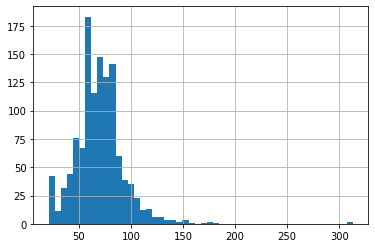

In [18]:
train['LotFrontage'].hist(bins = 50)

In [19]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<font size="4">Here I am going to impute the missing values in this variable with values in between 25th percentile and 75th percentile randomly.</font>

In [20]:
train['LotFrontage'].fillna(np.random.randint(59,80), inplace = True)

In [21]:
test['LotFrontage'].fillna(np.random.randint(59,80), inplace = True)

<AxesSubplot:>

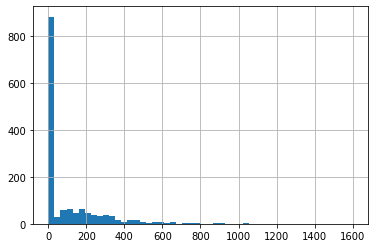

In [22]:
train['MasVnrArea'].hist(bins = 50)

In [23]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<font size="4">Although the distribution is skewed mean and median values are both zero. Hence I will impute these missing values with zero.</font>

In [24]:
train['MasVnrArea'].fillna(0, inplace = True)
test['MasVnrArea'].fillna(0, inplace = True)

<font size="4"> I will remove the 'GarageYrBlt' variable. Since it is difficult to impute date values correctly.</font>

In [25]:
train=train.drop(['GarageYrBlt'],1)
test=test.drop(['GarageYrBlt'],1)

In [26]:
features=[features for features in train.columns if train[features].isnull().sum()>1]
if len(features)==0:
    print("No missing values in training set")

No missing values in training set


In [27]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

<font size="4"> There are variables containing missing values although there were not in training set. Here I impute them using train set values.</font>

In [28]:
test['MSZoning']=test['MSZoning'].fillna(train['MSZoning'].mode()[0])
test['Utilities']=test['Utilities'].fillna(train['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(train['BsmtFullBath'].mean())
test['KitchenQual']=test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(train['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(train['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(train['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(train['SaleType'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean())

In [29]:
features=[features for features in test.columns if test[features].isnull().sum()>1]
if len(features)==0:
    print("No missing values in test set")
else:
    print("there are missing values in test set")

No missing values in test set


<font size="4">Missing values have been imputed with different techniques and the variables with more than 20 percent missing values have been removed. Now let's see how price varies with other variables. Here I will provide only the important plots and other details. </font>

In [30]:
# response variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

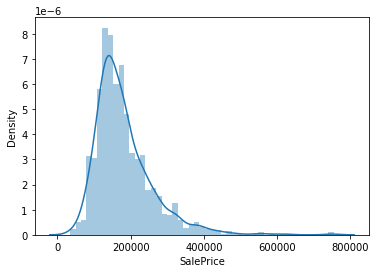

In [31]:
sns.distplot(train['SalePrice']);

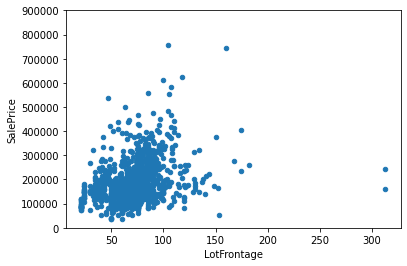

In [32]:
#scatter plot saleprice vs 
data = pd.concat([train['SalePrice'], train['LotFrontage']], axis=1)
data.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0,900000));

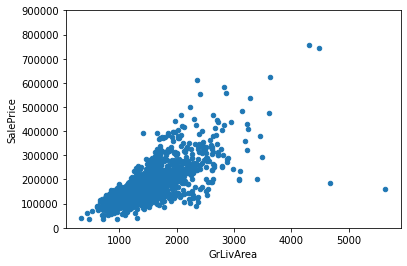

In [33]:
#scatter plot saleprice vs GrLivArea
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,900000));

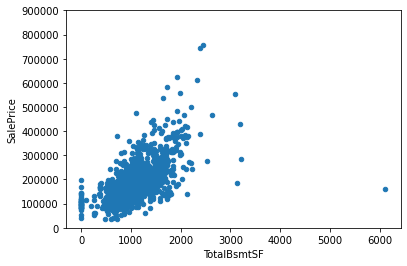

In [34]:
#scatter plot saleprice vs GrLivArea
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,900000));

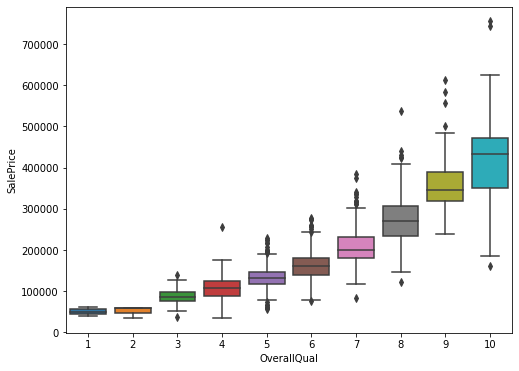

In [35]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

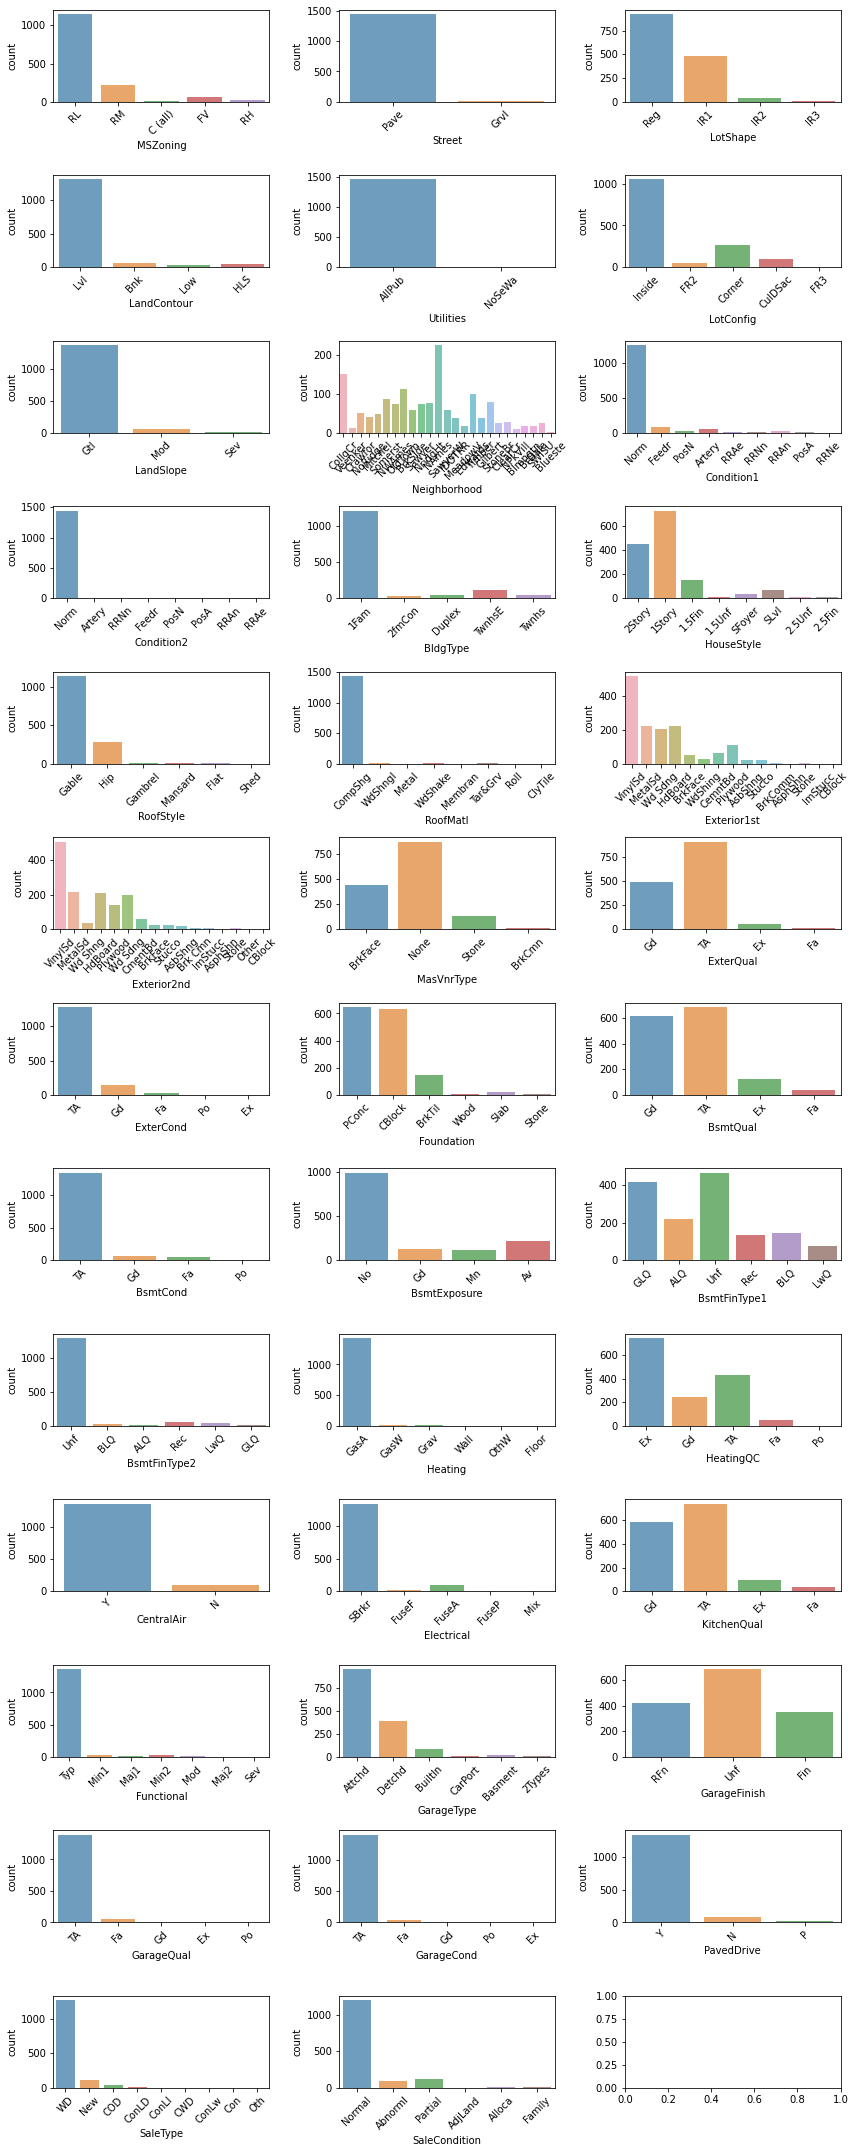

In [36]:
fig, axes = plt.subplots(round(len(categorical_cols_train.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_cols_train.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical_cols_train.columns[i], alpha=0.7, data=categorical_cols_train, ax=ax)

fig.tight_layout()

<font size="4">we can see that in some variables some categories cannot be found in large numbers. Hence just one hot encoding may provide lot of variables which are not needed to the model. Hence we can try a different method rather than creating dummies for all categories.</font>

In [37]:
for cols in categorical_cols_train.columns:
    print(cols,':', len(categorical_cols_train[cols].unique()),'labels')

MSZoning : 5 labels
Street : 2 labels
LotShape : 4 labels
LandContour : 4 labels
Utilities : 2 labels
LotConfig : 5 labels
LandSlope : 3 labels
Neighborhood : 25 labels
Condition1 : 9 labels
Condition2 : 8 labels
BldgType : 5 labels
HouseStyle : 8 labels
RoofStyle : 6 labels
RoofMatl : 8 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
MasVnrType : 4 labels
ExterQual : 4 labels
ExterCond : 5 labels
Foundation : 6 labels
BsmtQual : 4 labels
BsmtCond : 4 labels
BsmtExposure : 4 labels
BsmtFinType1 : 6 labels
BsmtFinType2 : 6 labels
Heating : 6 labels
HeatingQC : 5 labels
CentralAir : 2 labels
Electrical : 5 labels
KitchenQual : 4 labels
Functional : 7 labels
GarageType : 6 labels
GarageFinish : 3 labels
GarageQual : 5 labels
GarageCond : 5 labels
PavedDrive : 3 labels
SaleType : 9 labels
SaleCondition : 6 labels


<font size="4">For some variables there are more than 10 categories and some of them contain very few observations. So here I am going to remove those variables and get the most frequent categories from those variables. This will reduce the dimensionality when creating dummy variables for categorical variables.</font>

In [38]:
categorical_cols_train.Condition1.value_counts().sort_values(ascending=False)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

<font size="4"> we can see that although there are 9 categories many of them do not conatain observations.So I will get only the most frequent four categories.</font>

In [39]:
freq_labels= [x for x in categorical_cols_train.Condition1.value_counts().sort_values(ascending=False).head(4).index]
freq_labels

['Norm', 'Feedr', 'Artery', 'RRAn']

In [40]:
for label in freq_labels:
    categorical_cols_train[label]= np.where(categorical_cols_train['Condition1']==label,1,0)

In [41]:
categorical_cols_train[['Condition1']+freq_labels].head(10)

,Condition1,Norm,Feedr,Artery,RRAn
0,Norm,1,0,0,0
1,Feedr,0,1,0,0
2,Norm,1,0,0,0
3,Norm,1,0,0,0
4,Norm,1,0,0,0
5,Norm,1,0,0,0
6,Norm,1,0,0,0
7,PosN,0,0,0,0
8,Artery,0,0,1,0
9,Artery,0,0,1,0


In [42]:
def one_hot_freq_labels(data,variable,freq_labels):
    for label in freq_labels:
        data[variable+'_'+label]= np.where(data[variable]==label,1,0)

In [43]:
# the categories have been selected manually according to their frequencies

freq_labels_Condition1=[x for x in categorical_cols_train.Condition1.value_counts().sort_values(ascending=False).head(4).index]
freq_labels_Exterior2nd= [x for x in categorical_cols_train.Exterior2nd.value_counts().sort_values(ascending=False).head(5).index]
freq_labels_Condition2=[x for x in categorical_cols_train.Condition2.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_HouseStyle =[x for x in categorical_cols_train.HouseStyle .value_counts().sort_values(ascending=False).head(4).index]
freq_labels_RoofStyle =[x for x in categorical_cols_train.RoofStyle.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_RoofMatl  =[x for x in categorical_cols_train.RoofMatl.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Exterior1st =[x for x in categorical_cols_train.Exterior1st.value_counts().sort_values(ascending=False).head(5).index]
freq_labels_MasVnrType =[x for x in categorical_cols_train.MasVnrType.value_counts().sort_values(ascending=False).head(3).index]

freq_labels_ExterQual =[x for x in categorical_cols_train.ExterQual.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_ExterCond =[x for x in categorical_cols_train.ExterCond.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Foundation =[x for x in categorical_cols_train.Foundation.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtQual =[x for x in categorical_cols_train.BsmtQual.value_counts().sort_values(ascending=False).head(4).index]
freq_labels_BsmtCond =[x for x in categorical_cols_train.BsmtCond.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtExposure =[x for x in categorical_cols_train.BsmtExposure.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtFinType1=[x for x in categorical_cols_train.BsmtFinType1.value_counts().sort_values(ascending=False).head(6).index]

freq_labels_BsmtFinType2 =[x for x in categorical_cols_train.BsmtFinType2.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Heating =[x for x in categorical_cols_train.Heating.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_HeatingQC =[x for x in categorical_cols_train.HeatingQC.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_CentralAir =[x for x in categorical_cols_train.BsmtExposure.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_Electrical=[x for x in categorical_cols_train.BsmtFinType1.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_KitchenQual=[x for x in categorical_cols_train.KitchenQual.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Functional =[x for x in categorical_cols_train.Functional.value_counts().sort_values(ascending=False).head(2).index]

freq_labels_GarageType =[x for x in categorical_cols_train.GarageType.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_GarageFinish =[x for x in categorical_cols_train.GarageFinish.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_GarageQual=[x for x in categorical_cols_train.GarageQual.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_GarageCond=[x for x in categorical_cols_train.GarageCond.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_PavedDrive =[x for x in categorical_cols_train.PavedDrive.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_SaleType =[x for x in categorical_cols_train.SaleType.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_SaleCondition =[x for x in categorical_cols_train.SaleCondition.value_counts().sort_values(ascending=False).head(3).index]

freq_labels_MSZoning =[x for x in categorical_cols_train.MSZoning.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Street =[x for x in categorical_cols_train.Street.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_LotShape=[x for x in categorical_cols_train.LotShape.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_LandContour=[x for x in categorical_cols_train.LandContour.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Utilities =[x for x in categorical_cols_train.Utilities.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_LotConfig =[x for x in categorical_cols_train.LotConfig.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_LandSlope =[x for x in categorical_cols_train.LandSlope.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_BldgType=[x for x in categorical_cols_train.BldgType.value_counts().sort_values(ascending=False).head(3).index]



<font size="4"> Now I will combine test and train sets before creating dummy varaibles since there may be differences in columns if that was done seperately. </font>

In [44]:
df=pd.concat([train,test],axis=0)

In [45]:
one_hot_freq_labels(df,'Exterior2nd',freq_labels_Exterior2nd)
one_hot_freq_labels(df,'Condition1',freq_labels_Condition1)
one_hot_freq_labels(df,'Condition2',freq_labels_Condition2)
one_hot_freq_labels(df,'HouseStyle',freq_labels_HouseStyle)
one_hot_freq_labels(df,'RoofStyle',freq_labels_RoofStyle)
one_hot_freq_labels(df,'RoofMatl',freq_labels_RoofMatl )
one_hot_freq_labels(df,'Exterior1st',freq_labels_Exterior1st)
one_hot_freq_labels(df,'MasVnrType',freq_labels_MasVnrType)
one_hot_freq_labels(df,'ExterQual',freq_labels_ExterQual)
one_hot_freq_labels(df,'ExterCond',freq_labels_ExterCond )
one_hot_freq_labels(df,'Foundation',freq_labels_Foundation)
one_hot_freq_labels(df,'BsmtQual',freq_labels_BsmtQual)
one_hot_freq_labels(df,'BsmtCond',freq_labels_BsmtCond)
one_hot_freq_labels(df,'BsmtExposure',freq_labels_BsmtExposure)
one_hot_freq_labels(df,'BsmtFinType1',freq_labels_BsmtFinType1)
one_hot_freq_labels(df,'BsmtFinType2',freq_labels_BsmtFinType2 )
one_hot_freq_labels(df,'Heating',freq_labels_Heating)
one_hot_freq_labels(df,'HeatingQC',freq_labels_HeatingQC)
one_hot_freq_labels(df,'CentralAir',freq_labels_CentralAir)
one_hot_freq_labels(df,'Electrical',freq_labels_Electrical)
one_hot_freq_labels(df,'KitchenQual',freq_labels_KitchenQual)
one_hot_freq_labels(df,'Functional',freq_labels_Functional)
one_hot_freq_labels(df,'GarageType',freq_labels_GarageType)
one_hot_freq_labels(df,'GarageFinish',freq_labels_GarageFinish)
one_hot_freq_labels(df,'GarageQual',freq_labels_GarageQual)
one_hot_freq_labels(df,'GarageCond',freq_labels_GarageCond)
one_hot_freq_labels(df,'PavedDrive',freq_labels_PavedDrive)
one_hot_freq_labels(df,'SaleType',freq_labels_SaleType)
one_hot_freq_labels(df,'SaleCondition',freq_labels_SaleCondition)

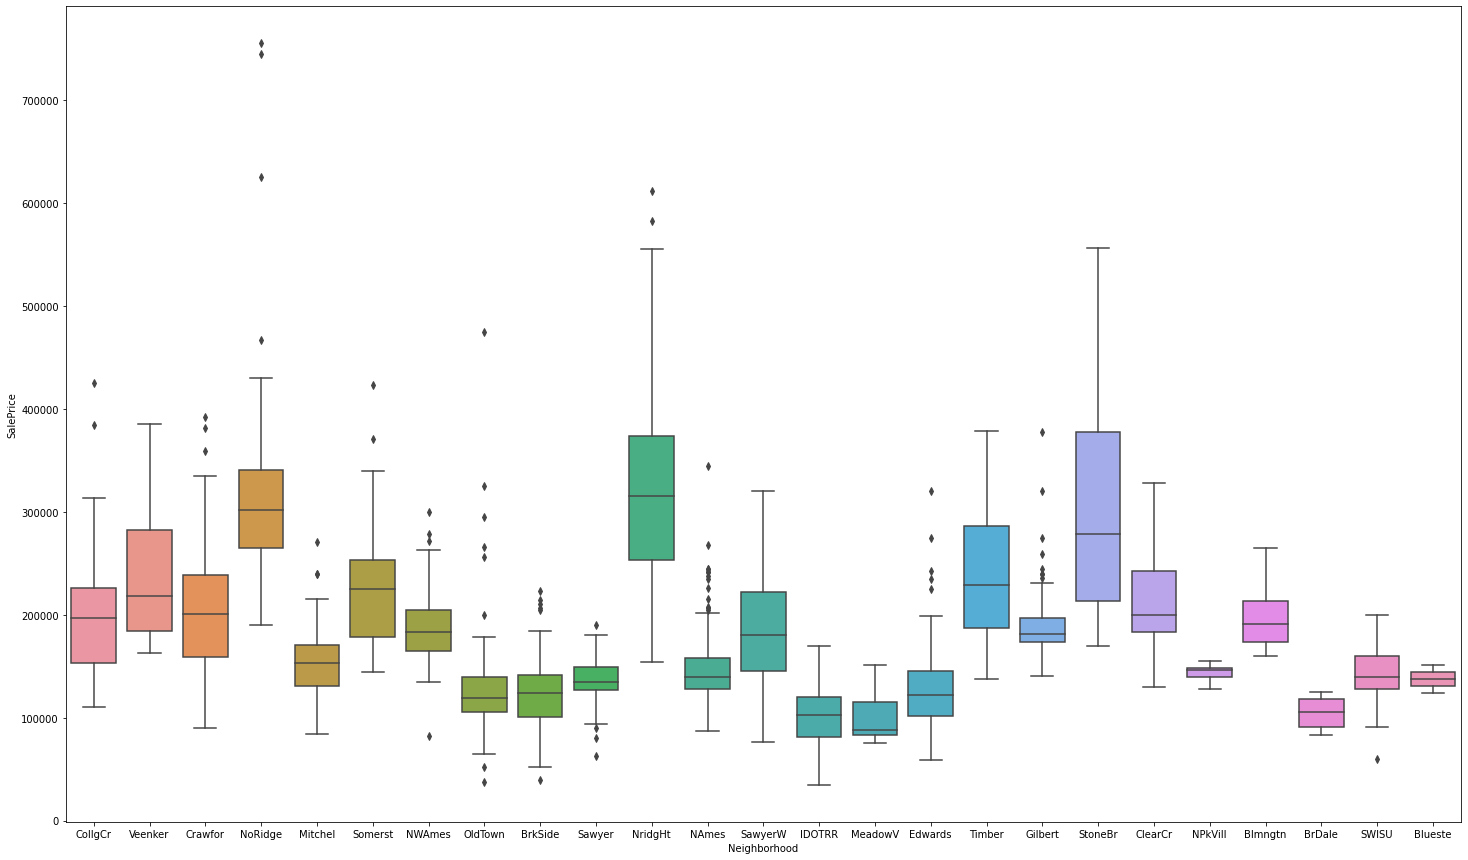

In [46]:
data = pd.concat([train['SalePrice'], train['Neighborhood']], axis=1)
f, ax = plt.subplots(figsize=(25, 15))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data)

<font size="4"> Since there is a price variation among neighborhoods. I will create dummies for most frequent 10 neighborhoods. other than this method we can use probability values instead of this.</font>

In [47]:
freq_labels_Neighborhood =[x for x in categorical_cols_train.Neighborhood.value_counts().sort_values(ascending=False).head(8).index]
freq_labels_Neighborhood
one_hot_freq_labels(df,'Neighborhood',freq_labels_Neighborhood)


<font size="4"> Now we can remove the original categorical variables from the dataframe.</font>

In [48]:
df=df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],1)

In [49]:
df.shape

(2919, 128)

In [50]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleCondition_Abnorml,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NridgHt,Neighborhood_Sawyer
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df['SalePrice'].isnull().sum()

1459

In [52]:
df_train=df.iloc[:1460,:]
df_test=df.iloc[1460:,:]

<AxesSubplot:>

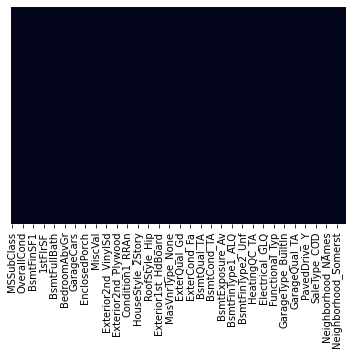

In [53]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

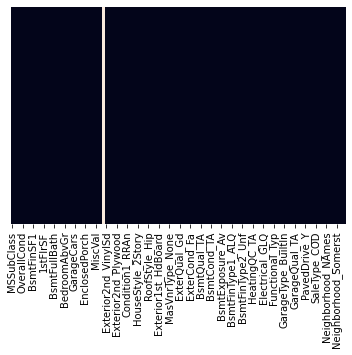

In [54]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [55]:
X=df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']

<font size="4"> Since there are no values for saleprice in test set, to select best model we need to divide trainset into two. This works as a validation set.</font>

## <p style="background-color:#A7FC86;color:black;font-size:21px;text-align:center;border-radius:10px 10px;">✨Model fitting</p>

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [57]:
from sklearn import metrics

def model_scores(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
lr= LinearRegression()
lr.fit(x_train, y_train)
print("Training set score: {:.2f}".format(lr.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = lr.predict(x_test)
train_pred = lr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.87
Test set score: 0.86

_____________________________________
Test set evaluation:
_____________________________________
MAE: 19067.24681602365
MSE: 775230282.4383783
RMSE: 27842.95750164444
R2 Square 0.8588591134837213
__________________________________
Train set evaluation:
_____________________________________
MAE: 17715.944392315512
MSE: 850212591.918737
RMSE: 29158.405167613968
R2 Square 0.8693687128203251
__________________________________


In [60]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = lasso.predict(x_test)
train_pred = lasso.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.87
Test set score: 0.86

_____________________________________
Test set evaluation:
_____________________________________
MAE: 19064.63237068787
MSE: 774725111.1102121
RMSE: 27833.88422606899
R2 Square 0.8589510865796067
__________________________________
Train set evaluation:
_____________________________________
MAE: 17715.363779760348
MSE: 850212958.0441388
RMSE: 29158.411445827063
R2 Square 0.8693686565668268
__________________________________


In [61]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(random_state=2)
enet.fit(x_train, y_train)
print("Training set score: {:.2f}".format(enet.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(enet.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = enet.predict(x_test)
train_pred = enet.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.82
Test set score: 0.84

_____________________________________
Test set evaluation:
_____________________________________
MAE: 19639.109384136307
MSE: 854421569.5440036
RMSE: 29230.490408886464
R2 Square 0.844441296327125
__________________________________
Train set evaluation:
_____________________________________
MAE: 18982.97638091549
MSE: 1166192791.3587909
RMSE: 34149.565024444906
R2 Square 0.8208197962687693
__________________________________


In [62]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
print("Training set score: {:.2f}".format(dt.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(dt.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = dt.predict(x_test)
train_pred = dt.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 1.00
Test set score: 0.70

_____________________________________
Test set evaluation:
_____________________________________
MAE: 26860.16780821918
MSE: 1634547336.1541095
RMSE: 40429.535443214154
R2 Square 0.7024091224197619
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [63]:
bg= BaggingRegressor(random_state=5)
bg.fit(x_train, y_train)
print("Training set score: {:.2f}".format(bg.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(bg.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = bg.predict(x_test)
train_pred = bg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.98
Test set score: 0.86

_____________________________________
Test set evaluation:
_____________________________________
MAE: 18427.5948630137
MSE: 794220460.0802397
RMSE: 28181.91725344888
R2 Square 0.8554017014499145
__________________________________
Train set evaluation:
_____________________________________
MAE: 7625.26301369863
MSE: 155394096.74503425
RMSE: 12465.716856444087
R2 Square 0.9761244057417265
__________________________________


In [64]:
gbm= GradientBoostingRegressor(random_state=123)
gbm.fit(x_train, y_train)
print("Training set score: {:.2f}".format(gbm.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(gbm.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = gbm.predict(x_test)
train_pred =gbm.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.97
Test set score: 0.88

_____________________________________
Test set evaluation:
_____________________________________
MAE: 16383.206189851218
MSE: 640000430.6039678
RMSE: 25298.229791903777
R2 Square 0.8834794896529028
__________________________________
Train set evaluation:
_____________________________________
MAE: 10117.062053668113
MSE: 189115547.76989967
RMSE: 13751.928874521554
R2 Square 0.9709432585853391
__________________________________


In [65]:
rf= RandomForestRegressor(random_state=5)
rf.fit(x_train, y_train)
print("Training set score: {:.2f}".format(rf.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(rf.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = rf.predict(x_test)
train_pred =rf.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.98
Test set score: 0.87

_____________________________________
Test set evaluation:
_____________________________________
MAE: 17550.177842465753
MSE: 723782379.9342831
RMSE: 26903.203897199364
R2 Square 0.8682258819566857
__________________________________
Train set evaluation:
_____________________________________
MAE: 6483.778030821918
MSE: 119365893.09591626
RMSE: 10925.469925633233
R2 Square 0.9816599749184126
__________________________________


In [66]:
from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(random_state=5)
ada.fit(x_train, y_train)
print("Training set score: {:.2f}".format(ada.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(ada.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = ada.predict(x_test)
train_pred =ada.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.88
Test set score: 0.79

_____________________________________
Test set evaluation:
_____________________________________
MAE: 23746.885853871045
MSE: 1155091660.6726065
RMSE: 33986.639443649125
R2 Square 0.7897003449322153
__________________________________
Train set evaluation:
_____________________________________
MAE: 21683.73315991253
MSE: 773639610.7111405
RMSE: 27814.377769620165
R2 Square 0.8811338021561103
__________________________________


In [67]:
from sklearn.ensemble import VotingRegressor
m1 = LinearRegression()
m2 = RandomForestRegressor(random_state=5)
vr = VotingRegressor([('lr', m1), ('rf', m2)])
vr.fit(x_train, y_train)
print("Training set score: {:.2f}".format(vr.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(vr.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = vr.predict(x_test)
train_pred =vr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.95
Test set score: 0.89

_____________________________________
Test set evaluation:
_____________________________________
MAE: 15820.518047299312
MSE: 595981337.583106
RMSE: 24412.72900728442
R2 Square 0.8914937454854603
__________________________________
Train set evaluation:
_____________________________________
MAE: 10931.182619256657
MSE: 353499191.02091074
RMSE: 18801.574163375542
R2 Square 0.9456864615050902
__________________________________


In [68]:
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
estimators = [ ('lr',LinearRegression()),('rf', make_pipeline(RandomForestRegressor(random_state=5))),('gbm',GradientBoostingRegressor(random_state=123))]
sr = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())
sr.fit(x_train, y_train)
print("Training set score: {:.2f}".format(sr.score(x_train, y_train))) 
print("Test set score: {:.2f}".format(sr.score(x_test, y_test)))
print("\n_____________________________________")
test_pred = sr.predict(x_test)
train_pred =sr.predict(x_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.97
Test set score: 0.89

_____________________________________
Test set evaluation:
_____________________________________
MAE: 16159.07590752693
MSE: 623216709.4984678
RMSE: 24964.308712609443
R2 Square 0.8865351872043727
__________________________________
Train set evaluation:
_____________________________________
MAE: 9573.617402101892
MSE: 169501358.873957
RMSE: 13019.26875342686
R2 Square 0.9739568892546755
__________________________________


## <p style="background-color:#A7FC86;color:black;font-size:21px;text-align:center;border-radius:10px 10px;">💎Results </p>

<font size="4">If there is multicollinearity it is better to use regularized regression methods and other machine learning models. Since we want the predictions to be more accurate and do not make any inferences, we just ignore correlation.</font>

<font size="4">From above models <span style="color:blue;">voting regressor</span> has the highest R square value of   <span style="color:blue;">89.17%</span> and the smallest MAE.</font>

<font size="4"><b>Highly appreciate your questions or feedback  related to this notebook. THANK YOU 😊 </b></font>

<center><img src="https://media.giphy.com/media/5pUD7c0pvyXgfYUoQM/giphy.gif"></center>
